In [1]:
! pip install missingno

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:

import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split

In [3]:
# Descargar el dataset directamente desde GitHub
!wget -O AB_NYC_2019.csv https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv

--2025-11-07 22:06:12--  https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.75M  --.-KB/s    in 0.05s   

2025-11-07 22:06:12 (138 MB/s) - ‘AB_NYC_2019.csv’ saved [7077973/7077973]



In [4]:
# --- PASO 1: Cargar los datos ---
import pandas as pd

# Cargar el archivo CSV del proyecto
data = pd.read_csv("AB_NYC_2019.csv")
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Ver las primeras filas
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


PASO POR PASO 

1.Informacion general

In [5]:
# Información básica sobre el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df = pd.read_csv('../data/raw/internal-link(1).csv')


# Identificar y eliminar columnas con valores constantes

In [7]:
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
import pandas as pd

# 1. Cargar los datos
df = pd.read_csv('AB_NYC_2019.csv')

# 2. Verificar valores únicos
unicos = df.nunique()

# 3. Eliminar columnas con un solo valor
df.drop(unicos[unicos == 1].index, axis=1, inplace=True)

# 4. Comprobar que se eliminó correctamente
df.shape


(48895, 16)

Estadisticas descriptivas

In [9]:
# Estadísticas descriptivas (solo para columnas numéricas)
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Valores nuulos y duplicados

In [10]:
# Contar valores faltantes
print("Valores nulos por columna:")
print(data.isnull().sum())

# Contar duplicados
print("\nFilas duplicadas:", data.duplicated().sum())


Valores nulos por columna:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Filas duplicadas: 0


 Eliminar los datos irrevelantes 

In [11]:
df = pd.read_csv('../data/raw/internal-link(1).csv')


In [12]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Valores faltantes

In [13]:
df.shape

(48895, 16)

In [14]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

Analisis de precios y tipos de habitaciones

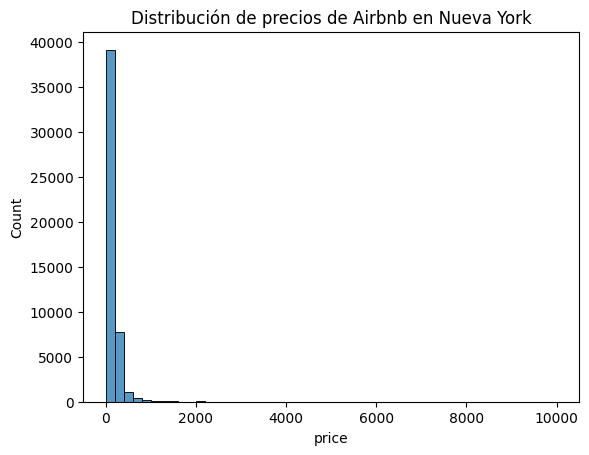

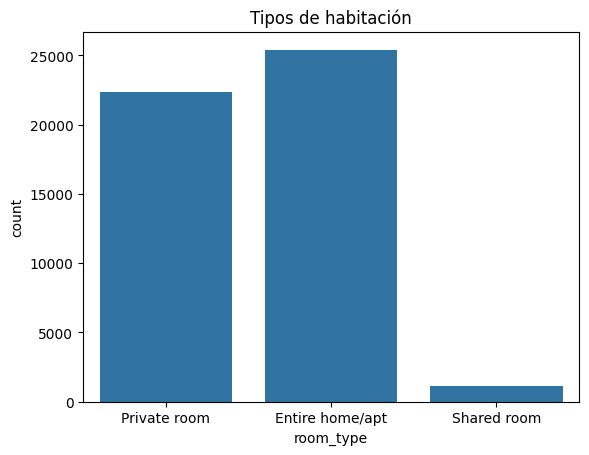

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de precios
sns.histplot(data=data, x="price", bins=50)
plt.title("Distribución de precios de Airbnb en Nueva York")
plt.show()

# Distribución de tipos de habitación
sns.countplot(data=data, x="room_type")
plt.title("Tipos de habitación")
plt.show()

 Primer grafico:

 El eje X (horizontal) representa el precio por noche de los alojamientos.

 El eje Y (vertical) muestra cuántos alojamientos hay para cada rango de precio (Count = frecuencia).

 El título lo deja claro: “Distribución de precios de Airbnb en Nueva York”.

Segundo grafico:

El eje X muestra los tipos de habitación (room_type):

Private room → Habitación privada.

Entire home/apt → Vivienda o apartamento completo.

Shared room → Habitación compartida.

El eje Y muestra el número de alojamientos (count) de cada tipo.


RESUMEN

La mayoría de los alojamientos de Airbnb en Nueva York son baratos (menos de 500 USD por noche),
pero existen unos pocos con precios muy altos que hacen que el eje se alargue hasta los 10 000 USD.

  Mayoría: Vivienda completa.

  Segunda opción: Habitación privada.

  Muy pocos: Habitaciones compartidas.

Separar en train y test

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (39116, 16)
Test shape: (9779, 16)


Guardar los datos procesados

In [17]:
train.to_csv("../data/processed/train.csv", index=False)
test.to_csv("../data/processed/test.csv", index=False)


In [18]:
import os

os.makedirs("../data/processed", exist_ok=True)
train.to_csv("../data/processed/train.csv", index=False)
test.to_csv("../data/processed/test.csv", index=False)
